<a href="https://colab.research.google.com/github/rahiakela/machine-learning-research-and-practice/blob/main/ensemble-methods-for-machine-learning/02-homogeneous-parallel-ensembles/02_random_forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



##Random forests

Random forests perform bootstrap sampling to generate a
training subset (exactly like bagging), and then use randomized decision trees as base estimators.

Randomized decision trees are trained using a modified decision-tree learning
algorithm, which introduces randomness when growing our trees. This additional
source of randomness increases ensemble diversity and generally leads to better predictive performance.

Thus, random forests use a modified tree learning algorithm, which first randomly
samples features before creating a decision node. The resulting tree is a randomized
decision tree, which is a new type of base estimator.

In randomized decision-tree learning, we first randomly sample a subset of features(say, $f_2,f_4,f_5$} and then choose the best from among them (which is, say, $f_5$). This
means that the feature $f_3$ is no longer available at this stage of tree learning. Thus, randomization
has inherently forced tree learning to split on a different feature.

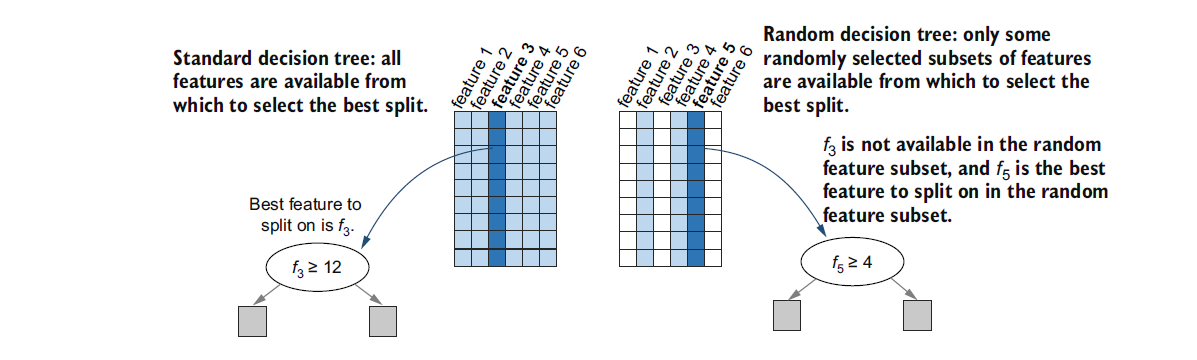

##Setup

In [ ]:
!wget https://github.com/gkunapuli/ensemble-methods-notebooks/raw/master/plot_utils.py

In [2]:
import time
import os
import pickle
import numpy as np

from scipy.stats import mode

from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from plot_utils import plot_2d_data, plot_2d_classifier

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
random_state = np.random.RandomState(seed=4190)

X, y = make_moons(n_samples=300, noise=.25, random_state=random_state)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_state)

##Random forests with scikit-learn

In [4]:
random_forest_ensemble = RandomForestClassifier(n_estimators=500,
                                                max_samples=100,
                                                oob_score=True,
                                                random_state=random_state)
random_forest_ensemble.fit(x_train, y_train)
y_pred = random_forest_ensemble.predict(x_test)

In [5]:
# let's obtain the OOB score
random_forest_ensemble.oob_score_

0.9502487562189055

In [6]:
# let's see generalization on the test set
accuracy_score(y_test, y_pred)

0.9191919191919192

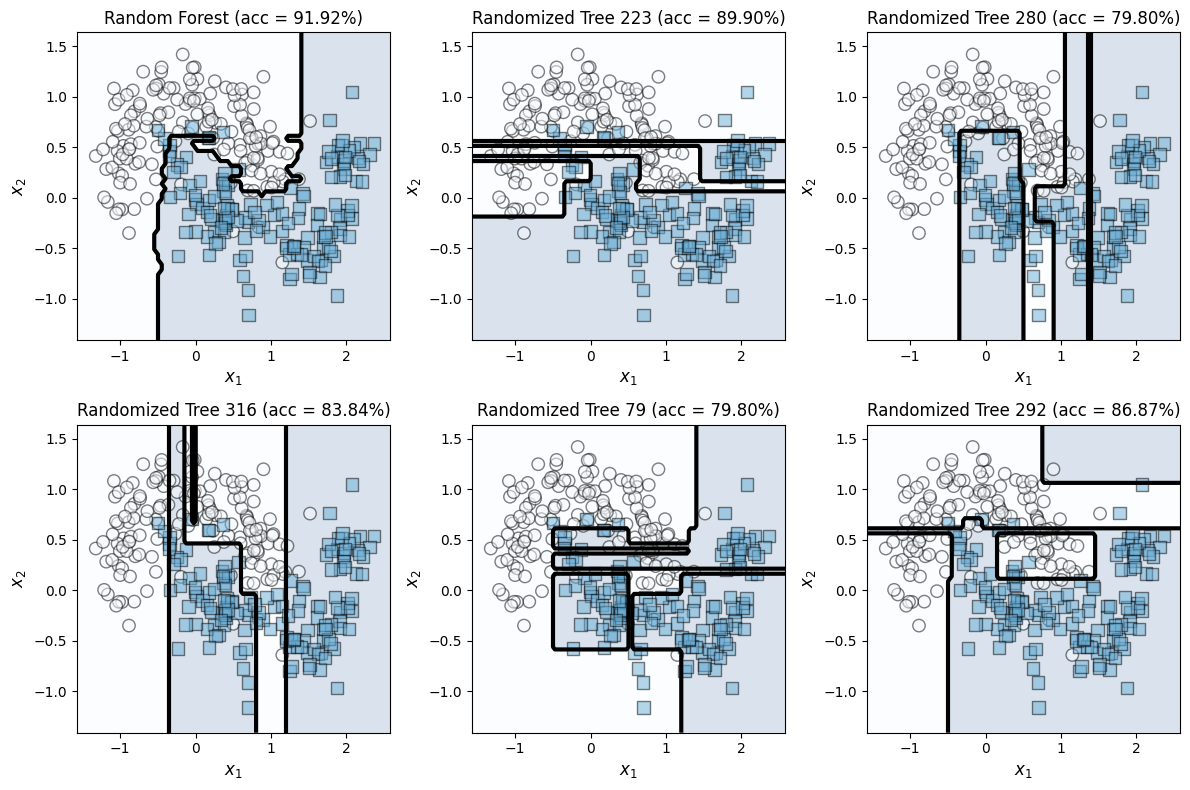

In [7]:
%matplotlib inline

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
trees_to_plot = np.random.choice(500, 5, replace=True)

title = 'Random Forest (acc = {0:4.2f}%)'.format(accuracy_score(y_test, y_pred)*100)
plot_2d_classifier(ax[0, 0], X, y, colormap='Blues', alpha=0.15, s=80,
                   predict_function=random_forest_ensemble.predict,
                   xlabel='$x_1$', ylabel='$x_2$', title=title)

for i in range(5):
    r, c = np.divmod(i + 1, 3)  # Get the row and column index of the subplot
    j = trees_to_plot[i]

    tst_acc_clf = accuracy_score(y_test, random_forest_ensemble[j].predict(x_test))

    # bag = bag_ens.estimators_samples_[j]
    # X_bag = X[bag, :]
    # y_bag = y[bag]

    title = 'Randomized Tree {1} (acc = {0:4.2f}%)'.format(tst_acc_clf*100, j+1)
    plot_2d_classifier(ax[r, c], X, y, colormap='Blues', alpha=0.15, s=80,
                       predict_function=random_forest_ensemble[j].predict,
                       xlabel='$x_1$', ylabel='$x_2$', title=title)

fig.tight_layout()

##Feature importances

We can obtain feature importances for the simple 2D data set.

In [8]:
for i, score in enumerate(random_forest_ensemble.feature_importances_):
  print(f"Feature x{i}: {score:6.5f}")

Feature x0: 0.48629
Feature x1: 0.51371


The feature scores for the simple two-dimensional data set suggest that both features
are roughly equally important.